In [20]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn import metrics 
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# =========== WINE =============
url_wine = "https://raw.githubusercontent.com/rafaeloliverone/colab-machine/main/database/wine.data"
col_names_wine = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']
feature_cols_wine = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']

# ========== ABALONE ===========
url_abalone = "https://raw.githubusercontent.com/rafaeloliverone/colab-machine/main/database/abalone.data"
col_names_abalone = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
feature_cols_abalone = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

raw_dataset_wine = pd.read_csv( url_wine , header=None, names=col_names_wine) 
raw_dataset_abalone = pd.read_csv( url_abalone ,header=None, names=col_names_abalone)


Relatório de desempenho dos algoritimos
Wine
Resultados 

In [ ]:
pd.DataFrame.from_dict(wine_results, orient='index')

In [21]:
# WINE DATASET TESTS

# Creating result vars 
wine_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 

wine_x = raw_dataset_wine[feature_cols_wine]
wine_y = raw_dataset_wine.label

x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(wine_x, wine_y, test_size=0.2, random_state=None, stratify=wine_y)
 # 80% treino e 20% teste


#Tree
wine_tree = tree.DecisionTreeClassifier()
wine_tree = wine_tree.fit(x_train_wine, y_train_wine )
wine_test_result = wine_tree.predict(x_test_wine)

#Taxa de acertos Three
wine_results['tree']    =  metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# KNN n=5 

wine_knn5= KNeighborsClassifier(n_neighbors=5)
wine_knn5.fit(x_train_wine, y_train_wine)
wine_test_result = wine_knn5.predict(x_test_wine)

#Taxa de acertos Knn5
wine_results['knn5'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# KNN n=10 
wine_knn10 = KNeighborsClassifier(n_neighbors=10)
wine_knn10.fit(x_train_wine, y_train_wine)
wine_test_result = wine_knn10.predict(x_test_wine)

#Taxa de acertos Knn10
wine_results['knn10'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# MLP1 
wine_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#wine_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8))
wine_mlp1.fit(x_train_wine, y_train_wine )
wine_test_result = wine_mlp1.predict(x_test_wine)

wine_results['mlp1'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# MLP2 
wine_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#wine_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
wine_mlp2.fit(x_train_wine, y_train_wine)
wine_test_result = wine_mlp2.predict(x_test_wine)

wine_results['mlp2'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100


# Kmeans
wine_km = KMeans(n_clusters=3)
wine_km.fit(x_train_wine, y_train_wine)
wine_test_result = wine_km.predict(x_test_wine)


wine_results['kmeans'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

x = raw_dataset_wine.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]].values
kmeans = KMeans(n_clusters=3)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorWineKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorWineKm.append(kmeans.inertia_)

print(wine_results)


Iteration 1, loss = 240.82191860
Iteration 2, loss = 237.72010010
Iteration 3, loss = 234.63892446
Iteration 4, loss = 231.57828728
Iteration 5, loss = 228.53831021
Iteration 6, loss = 225.51916439
Iteration 7, loss = 222.52106579
Iteration 8, loss = 219.54420198
Iteration 9, loss = 216.58873254
Iteration 10, loss = 213.65478825
Iteration 11, loss = 210.74246885
Iteration 12, loss = 207.85184053
Iteration 13, loss = 204.98293374
Iteration 14, loss = 202.13574116
Iteration 15, loss = 199.31021624
Iteration 16, loss = 196.50627188
Iteration 17, loss = 193.72377977
Iteration 18, loss = 190.96256972
Iteration 19, loss = 188.22242923
Iteration 20, loss = 185.50310263
Iteration 21, loss = 182.80428989
Iteration 22, loss = 180.12564518
Iteration 23, loss = 177.46677507
Iteration 24, loss = 174.82723706
Iteration 25, loss = 172.20653821
Iteration 26, loss = 169.60413438
Iteration 27, loss = 167.01943012
Iteration 28, loss = 164.45177931
Iteration 29, loss = 161.90048673
Iteration 30, loss = 15

In [22]:
# ABALONE DATASET TESTS

# Creating result vars 
abalone_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 

abalone_x = raw_dataset_abalone[feature_cols_abalone]
abalone_y = raw_dataset_abalone.label

x_train_abalone, x_test_abalone, y_train_abalone, y_test_abalone = train_test_split(abalone_x, abalone_y, test_size=0.2, random_state=None, stratify=abalone_y) 
# 80% treino e 20% teste

#Tree
abalone_tree = tree.DecisionTreeClassifier()
abalone_tree = abalone_tree.fit(x_train_abalone,y_train_abalone)
abalone_test_result = abalone_tree.predict(x_test_abalone)

#Taxa de acertos Three
abalone_results['tree']    =  metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# KNN n=5 

abalone_knn5= KNeighborsClassifier(n_neighbors=5)
abalone_knn5.fit(x_train_abalone, y_train_abalone)
abalone_test_result = abalone_knn5.predict(x_test_abalone)

#Taxa de acertos Knn5
abalone_results['knn5'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# KNN n=10 
abalone_knn10 = KNeighborsClassifier(n_neighbors=10)
abalone_knn10.fit(x_train_abalone,y_train_abalone)
abalone_test_result = abalone_knn10.predict(x_test_abalone)

#Taxa de acertos Knn10
abalone_results['knn10'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# MLP1 
abalone_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=300, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#abalone_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8))
abalone_mlp1.fit(x_train_abalone,y_train_abalone )
abalone_test_result = abalone_mlp1.predict(x_test_abalone)

abalone_results['mlp1'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# MLP2 
abalone_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=300, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#abalone_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
abalone_mlp2.fit(x_train_abalone,y_train_abalone)
abalone_test_result = abalone_mlp2.predict(x_test_abalone)

abalone_results['mlp2'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100


# Kmeans
abalone_km = KMeans(n_clusters=2)
abalone_km.fit(x_train_abalone,y_train_abalone)
abalone_test_result = abalone_km.predict(x_test_abalone)


abalone_results['kmeans'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

x = raw_dataset_abalone.iloc[:, [1,2,3,4,5,6,7,8]].values
kmeans = KMeans(n_clusters=2)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorAbaloneKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorAbaloneKm.append(kmeans.inertia_)

print(abalone_results)


Iteration 1, loss = 1.14317411
Iteration 2, loss = 1.13782373
Iteration 3, loss = 1.13347592
Iteration 4, loss = 1.12981953
Iteration 5, loss = 1.12637665
Iteration 6, loss = 1.12325009
Iteration 7, loss = 1.12018844
Iteration 8, loss = 1.11687346
Iteration 9, loss = 1.10808290
Iteration 10, loss = 1.09138918
Iteration 11, loss = 1.06022642
Iteration 12, loss = 1.03621498
Iteration 13, loss = 1.01836446
Iteration 14, loss = 1.00323948
Iteration 15, loss = 0.98960721
Iteration 16, loss = 0.97847706
Iteration 17, loss = 0.96729829
Iteration 18, loss = 0.95847235
Iteration 19, loss = 0.94902256
Iteration 20, loss = 0.94163190
Iteration 21, loss = 0.93540634
Iteration 22, loss = 0.92902053
Iteration 23, loss = 0.92300762
Iteration 24, loss = 0.91852588
Iteration 25, loss = 0.91302195
Iteration 26, loss = 0.90865670
Iteration 27, loss = 0.90499883
Iteration 28, loss = 0.90156467
Iteration 29, loss = 0.89874040
Iteration 30, loss = 0.89622087
Iteration 31, loss = 0.89571861
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': 48.44497607655502, 'knn5': 51.196172248803826, 'knn10': 52.87081339712919, 'mlp1': 53.22966507177034, 'mlp2': 54.78468899521531, 'kmeans': 0.0}


#**Relatório de desempenho dos algoritimos**

**Wine**

In [23]:
pd.DataFrame.from_dict(wine_results, orient='index')

,0
tree,94.444444
knn5,63.888889
knn10,63.888889
mlp1,55.555556
mlp2,55.555556
kmeans,50.000000


**Curva de taxa de erro em iterações da MLP2**

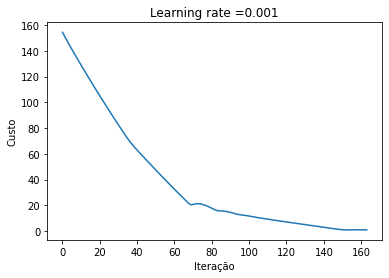

In [24]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(wine_mlp2.loss_curve_)

**Curva de taxa de erro em iterações K-means**

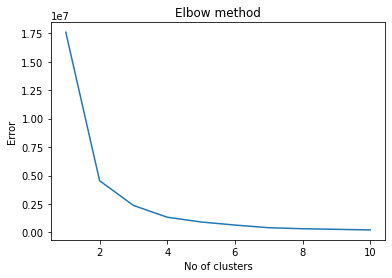

In [39]:
plt.plot(range(1,11), ErrorWineKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

# **Abalone**

In [40]:
pd.DataFrame.from_dict(abalone_results, orient='index')

,0
tree,48.444976
knn5,51.196172
knn10,52.870813
mlp1,53.229665
mlp2,54.784689
kmeans,0.000000


**Curva de taxa de erro em iterações da MLP1**

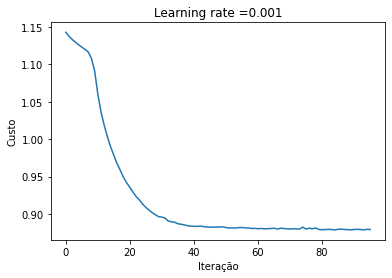

In [41]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(abalone_mlp1.loss_curve_)

**Curva de taxa de erro em iterações da MLP2**

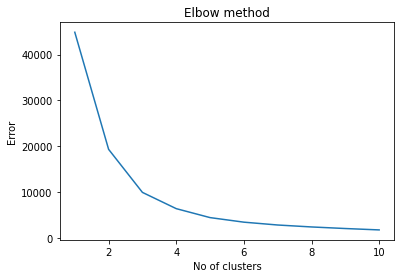

In [43]:

plt.plot(range(1,11), ErrorAbaloneKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()